# TTT4185 Machine learning for Speech technology

# Computer assignment 2: Classification using the Bayes Decision Rule and Support Vector Machines

This assignment assumes that the student has knowledge about the Bayes Decision Rule, maximum likelihood estimation and support vector machines.

In this assignment we will use `scikit-learn` (http://scikit-learn.org/stable/), which is a powerful and very popular Python toolkit for data analysis and machine learning, and `pandas` (https://pandas.pydata.org), which implements the all-powerful `DataFrame`.

We will also be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

In [2]:
# this will fetch the Train.csv and train.csv so you do not need to manually upload them. Just run this block for each session

! wget https://folk.ntnu.no/plparson/ttt4185_data/Train.csv
! wget https://folk.ntnu.no/plparson/ttt4185_data/Test.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


## Problem 1: Maximum Likelihood

In this problem we will use the Bayes decision rule to classify vowels based on their formants. The formants have been extracted from the open database `VTR Formants database` (http://www.seas.ucla.edu/spapl/VTRFormants.html) created by Microsoft and UCLA.



### Task 1

Download the files `Train.csv` and `Test.csv` from Blackboard then upload them to your Colab workspace. You can load them into a `pandas` dataframe using the command `pd.read_csv`. Using the training data, create a single scatter plot of "F1" vs "F2" for the three vowels
- "ae" as in "bat"
- "ey" as in "bait"
- "ux" as in "boot"

Just eyeing the plots, discuss which classes will be hardest to classify correctly.

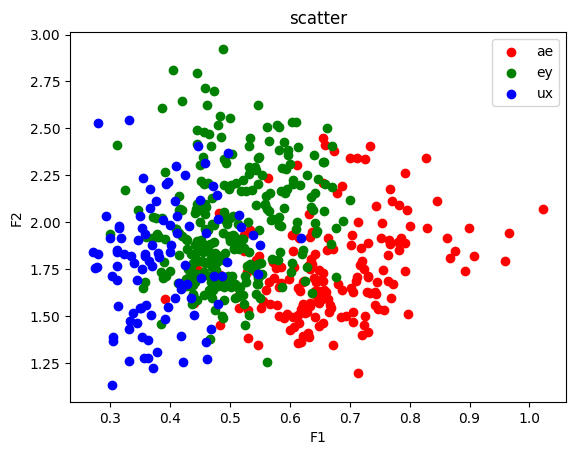

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Load data
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")

# Extract vowels
train = train[train['Phoneme'].isin(['ae', 'ey', 'ux'])]
test = test[test['Phoneme'].isin(['ae', 'ey', 'ux'])]

# Plotting here
AE = train[train['Phoneme'].isin(['ae'])]
EY = train[train['Phoneme'].isin(['ey'])]
UX = train[train['Phoneme'].isin(['ux'])]

plt.scatter(AE['F1'], AE['F2'], color = "r", label = "ae")
plt.scatter(EY['F1'], EY['F2'], color = "g", label = "ey")
plt.scatter(UX['F1'], UX['F2'], color = "b", label = "ux")
plt.title("scatter")
plt.xlabel("F1")
plt.ylabel("F2")
plt.legend()
plt.show()

looks like ey will be the hardest

### Task 2

 Use the Bayes Decision Rule to create a classifier for the phonemes 'ae', 'ey' and 'ux' under the following constraints:
- The feature vector $x$ contains the first two formants, "F1" and "F2".
- The distribution of $x$ given a phoneme $c$, $P(x|c)$, is Gaussian.
- Use the maximum likelihood estimator to estimate the model parameters.

In [6]:
phonemes = np.array(['ae','ey','ux'])

# gets meanmatrix and covariance matrix
def get_mu_sigma(dataframe, features):
    feature_matrix = np.array(dataframe[features])
    covariance_matrix = np.cov(feature_matrix.transpose())

    mu_vector = np.array([np.mean(feature_matrix.transpose()[i]) for i in range(len(features))])
    return mu_vector, covariance_matrix 


#dataset is the dataframe ex train, features = ['F1','F2',...], x = [F1, F2...]
def bayes_classifier(dataset, features, x):
    len_dataset = dataset.shape[0]
    P_c_x = np.array([])

    for phoneme in phonemes:
        #calculating #P(c)
        phonemes_dataset = dataset[dataset['Phoneme'].isin([phoneme])]
        len_phoneme = phonemes_dataset.shape[0]
        P_c = len_phoneme / len_dataset  #P(c)

        #calculating P(x|c)
        mu, sigma = get_mu_sigma(phonemes_dataset, features)
        distribution = sp.stats.multivariate_normal(mean = mu, cov = sigma)
        P_x_c = distribution.pdf(x) #P(x|c)

        P_c_x = np.append(P_c_x, P_c * P_x_c) #making list of "pointprobabilities P(c|x)"

    classification = phonemes[np.argmax(P_c_x)] #max P         
    return classification


#just a small test
features = np.array(['F1', 'F2'])

x = np.array([0.65, 1.75])
print(bayes_classifier(train, features, x))

x = np.array([0.5, 2.25])
print(bayes_classifier(train, features, x))

x = np.array([0.35, 1.25])
print(bayes_classifier(train, features, x))




    


ae
ey
ux


### Task 3

To visualize the classes models and the classifier created in Task 2, plot the contours for each Gaussian distribution in the model. That is, the class conditional likelihoods $P(x|c)$, by using the following function.

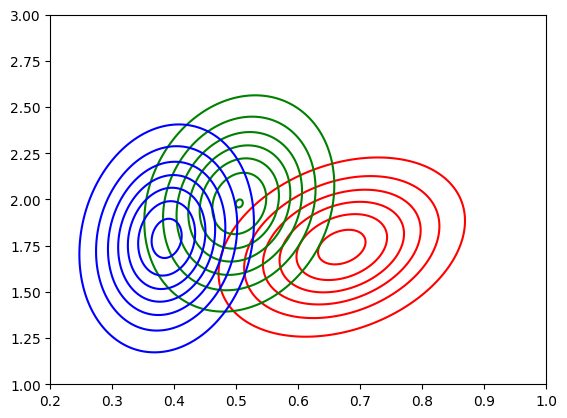

In [7]:
import scipy.stats

def plotGaussian(mean, cov, color, ax):
    """
        Creates a contour plot for a bi-variate normal distribution

        mean: numpy array 2x1 with mean vector
        cov: numpy array 2x2 with covarince matrix
        color: name of color for the plot (see https://matplotlib.org/stable/gallery/color/named_colors.html)
        ax: axis handle where the plot is drawn (can for example be returned by plt.gca() or plt.subplots())
    """
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x, y = np.mgrid[xlim[0]:xlim[1]:(xlim[1]-xlim[0])/500.0, ylim[0]:ylim[1]:(ylim[1]-ylim[0])/500.0]
    xy = np.dstack((x, y))
    mvn = scipy.stats.multivariate_normal(mean, cov)
    lik = mvn.pdf(xy)
    ax.contour(x,y,lik,colors=color)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlim(0.2, 1)
ax.set_ylim(1,3)


muAE, SigmaAE = get_mu_sigma(AE, features)
plotGaussian(muAE, SigmaAE, "red", ax)

muEY, SigmaEY = get_mu_sigma(EY, features)
plotGaussian(muEY, SigmaEY, "green", ax)

muUX, SigmaUX = get_mu_sigma(UX, features)
plotGaussian(muUX, SigmaUX, "blue", ax)



#### Optional

*Try:* Plot the decision regions for the Bayesian classifier. Tips: Calculate the posterior for each class, use the `numpy.argmax` function to get the decision regions, and `matplotlib.pyplot.contourf` to plot them.

[]

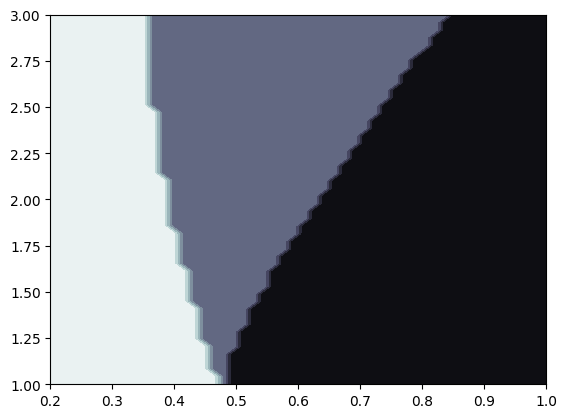

In [8]:
x = np.linspace(0.2, 1, 50)
y = np.linspace(1, 3,  50)
X, Y = np.meshgrid(x,y)

grid = np.dstack((X,Y))
grid = grid.reshape(-1,2)

feature_map = {'ae' : 0, 'ey' : 1, 'ux' : 2}

classifications = np.array([bayes_classifier(train, features, x) for x in grid])
classifications_numeric = np.vectorize(feature_map.get)(classifications)
classifications_numeric = classifications_numeric.reshape(X.shape)

#print(classifications_numeric)

plt.contourf(X,Y,classifications_numeric,cmap = plt.cm.bone)
plt.plot()



### Task 4

Test your classifier on the 'ae', 'ey' and 'ux' phonemes from the test set and present your results in a _confusion matrix_. That is, a table where you see how many times 'ae' was correctly classified, how many times it was wrongly classified as 'ey' and so on.

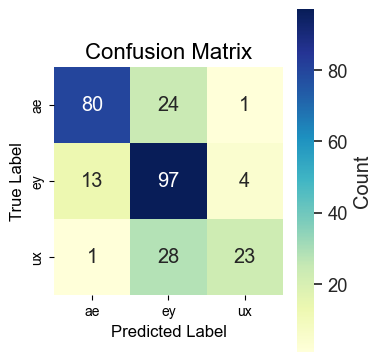

In [9]:
def plot_confusion_matrix(data, labels):# just a plotting function
    """Plot confusion matrix using heatmap (inline in notebook).

    Args:
        data (list of list or 2D array): Confusion matrix data.
        labels (list): Class labels for x and y axes.
    """
    plt.figure(figsize=(4, 4))
    plt.title("Confusion Matrix", fontsize=16)

    sns.set_theme(style="whitegrid", font_scale=1.2)
    ax = sns.heatmap(
        data,
        annot=True,
        fmt='g',  # integer-like values
        cmap="YlGnBu",
        xticklabels=labels,
        yticklabels=labels,
        cbar_kws={'label': 'Count'},
        square=True
    )

    ax.set_xlabel("Predicted Label", fontsize=12)
    ax.set_ylabel("True Label", fontsize=12)

    plt.tight_layout()
    plt.show()

AE_test = test[test['Phoneme'].isin(['ae'])] 
EY_test = test[test['Phoneme'].isin(['ey'])]
UX_test = test[test['Phoneme'].isin(['ux'])]

AE_two_formants = np.array([AE_test['F1'], AE_test['F2']]).T
EY_two_formants = np.array([EY_test['F1'], EY_test['F2']]).T
UX_two_formants = np.array([UX_test['F1'], UX_test['F2']]).T

#print(AE_two_formants)
#print(AEtest)

AE_test_classified = np.array([bayes_classifier(train, features, x) for x in AE_two_formants])
EY_test_classified = np.array([bayes_classifier(train, features, x) for x in EY_two_formants])
UX_test_classified = np.array([bayes_classifier(train, features, x) for x in UX_two_formants])

resultAE = np.array([np.size(np.where(AE_test_classified == phoneme)) for phoneme in phonemes])
resultEY = np.array([np.size(np.where(EY_test_classified == phoneme)) for phoneme in phonemes])
resultUX = np.array([np.size(np.where(UX_test_classified == phoneme)) for phoneme in phonemes])

result = np.asmatrix([resultAE,resultEY,resultUX])
plot_confusion_matrix(result, phonemes)





### Task 5

Extend your classifier to include the features "F1"-"F4" and compare the results with those in Task 4.

['F1' 'F2' 'F3' 'F4']


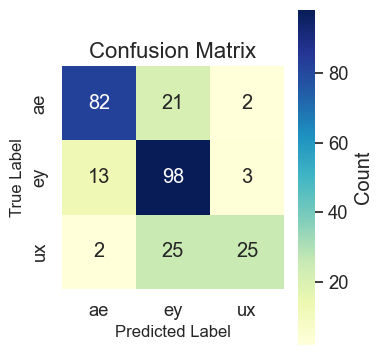

In [10]:
features = np.array(train.columns[3:7])
print(features)

AE_more_formants = np.array(AE_test[features])
EY_more_formants = np.array(EY_test[features])
UX_more_formants = np.array(UX_test[features])

AE_test_classified = np.array([bayes_classifier(train, features, x) for x in AE_more_formants])
EY_test_classified = np.array([bayes_classifier(train, features, x) for x in EY_more_formants])
UX_test_classified = np.array([bayes_classifier(train, features, x) for x in UX_more_formants])

resultAE = np.array([np.size(np.where(AE_test_classified == phoneme)) for phoneme in phonemes])
resultEY = np.array([np.size(np.where(EY_test_classified == phoneme)) for phoneme in phonemes])
resultUX = np.array([np.size(np.where(UX_test_classified == phoneme)) for phoneme in phonemes])

result = np.asmatrix([resultAE,resultEY,resultUX])
plot_confusion_matrix(result, phonemes)


not very much better. it seams like the first two formants are the ones to look for

### Task 6

Finally use all available information "F1"-"F4" and "B1-B4". How does the performance of this classifier compare with the simpler classifiers using fewer features?

['F1' 'F2' 'F3' 'F4' 'B1' 'B2' 'B3' 'B4']


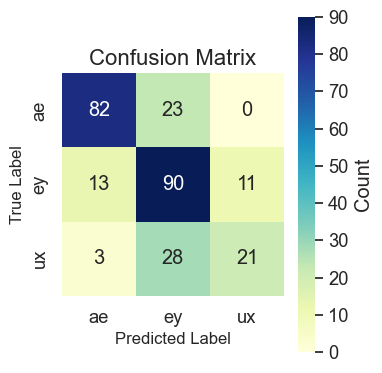

In [11]:
features = np.array(train.columns[3:])
print(features)

AE_more_formants = np.array(AE_test[features])
EY_more_formants = np.array(EY_test[features])
UX_more_formants = np.array(UX_test[features])

AE_test_classified = np.array([bayes_classifier(train, features, x) for x in AE_more_formants])
EY_test_classified = np.array([bayes_classifier(train, features, x) for x in EY_more_formants])
UX_test_classified = np.array([bayes_classifier(train, features, x) for x in UX_more_formants])

resultAE = np.array([np.size(np.where(AE_test_classified == phoneme)) for phoneme in phonemes])
resultEY = np.array([np.size(np.where(EY_test_classified == phoneme)) for phoneme in phonemes])
resultUX = np.array([np.size(np.where(UX_test_classified == phoneme)) for phoneme in phonemes])

result = np.asmatrix([resultAE,resultEY,resultUX])
plot_confusion_matrix(result, phonemes)

suddently it got worse

### Task 7

To better understand how important each feature is to the model, we will now perform permutation feature importance (https://scikit-learn.org/stable/modules/permutation_importance.html). The idea is that for each feature we will randomly shuffle the values and the ask the trained model to predict using this shuffled data. We can then observe how the performance degregates as each feature is shuffled.

For the model, take one of the 8 features (four formants and four bandwidths), shuffle and evaluate it 10 times. Repeat this process for each feature. Which feature has the biggest impact on model performance? Does this align with your knowlege of formants?

Below we've provided a sample function to get you started

In [12]:
def do_permutation_eval(classifier, df: pd.DataFrame, feature: str, num_iter: int) -> list:
    feat_results = []
    accuracy = np.array([0,0,0])
    shuffle_df = df.copy(deep=True)
    total_accuracy = np.zeros(num_iter)

    number_of_datapoints = df.shape[0]
    #print(number_of_datapoints)

    # shuffle and evaluate multiple times to ensure the trends are real
    for i in range(num_iter):
        shuffled_values = list(shuffle_df[feature])
        # shuffle does this in-place
        np.random.shuffle(shuffled_values)
        shuffle_df[feature] = shuffled_values

        # This is psuedo-code
        # Modify to work with your own classifier implementations

        AE_test = shuffle_df[shuffle_df['Phoneme'].isin(['ae'])]
        EY_test = shuffle_df[shuffle_df['Phoneme'].isin(['ey'])]
        UX_test = shuffle_df[shuffle_df['Phoneme'].isin(['ux'])]

        AE_more_formants = np.array(AE_test[features])
        EY_more_formants = np.array(EY_test[features])
        UX_more_formants = np.array(UX_test[features])

        AE_test_classified = np.array([bayes_classifier(train, features, x) for x in AE_more_formants])
        EY_test_classified = np.array([bayes_classifier(train, features, x) for x in EY_more_formants])
        UX_test_classified = np.array([bayes_classifier(train, features, x) for x in UX_more_formants])

        resultAE = np.array([np.size(np.where(AE_test_classified == phoneme)) for phoneme in phonemes])#n_classified [AE, EY, UX]
        resultEY = np.array([np.size(np.where(EY_test_classified == phoneme)) for phoneme in phonemes])
        resultUX = np.array([np.size(np.where(UX_test_classified == phoneme)) for phoneme in phonemes])

        accuracy_AE = resultAE[0] / AE_test.shape[0]
        accuracy_EY = resultEY[1] / EY_test.shape[0]
        accuracy_UX = resultUX[2] / UX_test.shape[0]

        current_accuracy = np.array([accuracy_AE, accuracy_EY, accuracy_UX])
        accuracy = np.vstack([accuracy, current_accuracy])

        #sorry is messy but is just correct answears devided number of all tests
        total_accuracy[i] = (resultAE[0] + resultEY[1] + resultUX[2]) / number_of_datapoints

    
    accuracy = accuracy[1:]
    
    #print(accuracy)
    feat_results = np.array([np.average(result) for result in accuracy.T])
    average_total_accuracy = np.average(total_accuracy)

    return feat_results, average_total_accuracy

#print(test))
features = np.array(train.columns[3:])
print(features)


for feature in features:
    feature_result, average_total_accuracy = do_permutation_eval(bayes_classifier, test, feature, 10)
    print(f"feature = {feature} gives accuracy{feature_result}\n and has a average total accuracy of {average_total_accuracy}")

['F1' 'F2' 'F3' 'F4' 'B1' 'B2' 'B3' 'B4']
feature = F1 gives accuracy[0.52190476 0.58070175 0.14807692]
 and has a average total accuracy of 0.4749077490774908
feature = F2 gives accuracy[0.84666667 0.53859649 0.53846154]
 and has a average total accuracy of 0.6579335793357934
feature = F3 gives accuracy[0.86285714 0.6122807  0.53653846]
 and has a average total accuracy of 0.6948339483394833
feature = F4 gives accuracy[0.79714286 0.74210526 0.44038462]
 and has a average total accuracy of 0.7055350553505535
feature = B1 gives accuracy[0.82571429 0.78070175 0.30961538]
 and has a average total accuracy of 0.7077490774907748
feature = B2 gives accuracy[0.7952381  0.71491228 0.47692308]
 and has a average total accuracy of 0.7003690036900369
feature = B3 gives accuracy[0.80857143 0.78859649 0.42115385]
 and has a average total accuracy of 0.725830258302583
feature = B4 gives accuracy[0.79809524 0.76140351 0.45769231]
 and has a average total accuracy of 0.7173431734317344


from this we can see that F1 is by far the most importan parameter as when shuffeled this drops to 47 % hitrate
I should have rounded the answears but i did not and im tired.

### Task 8

We want to make the model slightly more powerful by modeling the feature vector conditional on both the vowel and gender of speaker, that is $P(x|g,c)$, where $g$ is the gender of the speaker and $c$ is the phoneme label. Show how these models can be used for phoneme classification using marginalization over the gender.

Assume that $P(x|g,c)$ is a multivariate Gaussian and compute the maximum likelihood estimates for the models. Compare the result on the test set with the results in Task 5.

['F1' 'F2' 'F3' 'F4']


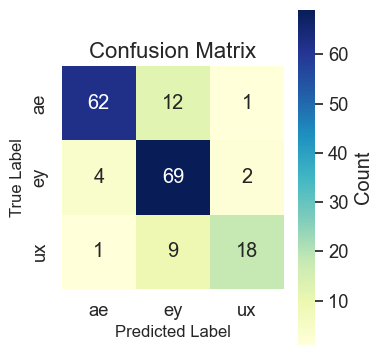

In [13]:
train_outward_penis_participants = train[train['Gender'].isin(['M'])]
train_inward_vagina_participants = train[train['Gender'].isin(['F'])]

test_outward_penis_participants = test[test['Gender'].isin(['M'])]
test_inward_vagina_participants = test[test['Gender'].isin(['F'])]

features = np.array(train.columns[3:7])
print(features)

#making relevant dataframes
AE_outward_penis_test = test_outward_penis_participants[test_outward_penis_participants['Phoneme'].isin(['ae'])]
EY_outward_penis_test = test_outward_penis_participants[test_outward_penis_participants['Phoneme'].isin(['ey'])]
UX_outward_penis_test = test_outward_penis_participants[test_outward_penis_participants['Phoneme'].isin(['ux'])]

AE_inward_vagina_test = test_inward_vagina_participants[test_inward_vagina_participants['Phoneme'].isin(['ae'])]
EY_inward_vagina_test = test_inward_vagina_participants[test_inward_vagina_participants['Phoneme'].isin(['ey'])]
UX_inward_vagina_test = test_inward_vagina_participants[test_inward_vagina_participants['Phoneme'].isin(['ux'])]

#making tests as array
AE_outward_penis_formants = np.array(AE_outward_penis_test[features])
EY_outward_penis_formants = np.array(EY_outward_penis_test[features])
UX_outward_penis_formants = np.array(UX_outward_penis_test[features])

AE_inward_vagina_formants = np.array(AE_inward_vagina_test[features])
EY_inward_vagina_formants = np.array(EY_inward_vagina_test[features])
UX_inward_vagina_formants = np.array(UX_inward_vagina_test[features])

#classifying
AE_outward_penis_classified = np.array([bayes_classifier(train_outward_penis_participants, features, x) for x in AE_outward_penis_formants])
EY_outward_penis_classified = np.array([bayes_classifier(train_outward_penis_participants, features, x) for x in EY_outward_penis_formants])
UX_outward_penis_classified = np.array([bayes_classifier(train_outward_penis_participants, features, x) for x in UX_outward_penis_formants])

AE_inward_vagina_classified = np.array([bayes_classifier(train_inward_vagina_participants, features, x) for x in AE_inward_vagina_formants])
EY_inward_vagina_classified = np.array([bayes_classifier(train_inward_vagina_participants, features, x) for x in EY_inward_vagina_formants])
UX_inward_vagina_classified = np.array([bayes_classifier(train_inward_vagina_participants, features, x) for x in UX_inward_vagina_formants])

#finding result
result_AE_outward_penis = np.array([np.size(np.where(AE_outward_penis_classified == phoneme)) for phoneme in phonemes])
result_EY_outward_penis = np.array([np.size(np.where(EY_outward_penis_classified == phoneme)) for phoneme in phonemes])
result_UX_outward_penis = np.array([np.size(np.where(UX_outward_penis_classified == phoneme)) for phoneme in phonemes])

result_AE_inward_vagina = np.array([np.size(np.where(AE_inward_vagina_classified == phoneme)) for phoneme in phonemes])
result_EY_inward_vagina = np.array([np.size(np.where(EY_inward_vagina_classified == phoneme)) for phoneme in phonemes])
result_UX_inward_vagina = np.array([np.size(np.where(UX_inward_vagina_classified == phoneme)) for phoneme in phonemes])


result_outward_penis = np.asmatrix([result_AE_outward_penis, result_EY_outward_penis, result_UX_outward_penis])
result_inward_vagina = np.asmatrix([result_AE_inward_vagina, result_EY_inward_vagina, result_UX_inward_vagina])
plot_confusion_matrix(result_outward_penis, phonemes)






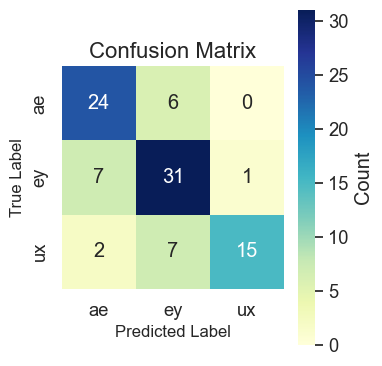

In [14]:
plot_confusion_matrix(result_inward_vagina,phonemes)

Both are significantly better.
sorting people according to their genetalia seem to create better classifiers in reagars of machine learning !

### Task 9

When using Gaussian classifiers we often avoid computing the entire covariance matrix, but instead we only use the diagonal of the matrix. Repeat the results in Task 5 using only diagonal covariance matrices and compare the results.

['F1' 'F2' 'F3' 'F4']


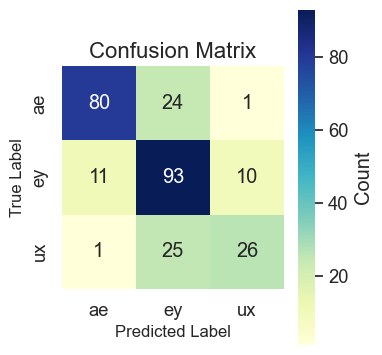

In [17]:
# gets meanmatrix and covariance matrix
def get_mu_sigma(dataframe, features):#changing this to only keep diagonal
    feature_matrix = np.array(dataframe[features])
    covariance_matrix = np.cov(feature_matrix.transpose())

    #making the diagonal matrix
    diagonal_matrix = np.zeros(covariance_matrix.shape)
    diagonal = np.array(covariance_matrix.diagonal())
    diagonal = diagonal.flatten()
    np.fill_diagonal(diagonal_matrix, diagonal)

    covariance_matrix = covariance_matrix.diagonal()

    mu_vector = np.array([np.mean(feature_matrix.transpose()[i]) for i in range(len(features))])
    return mu_vector, diagonal_matrix 


#dataset is the dataframe ex train, features = ['F1','F2',...], x = [F1, F2...]
def bayes_classifier(dataset, features, x):
    len_dataset = dataset.shape[0]
    P_c_x = np.array([])

    for phoneme in phonemes:
        #calculating #P(c)
        phonemes_dataset = dataset[dataset['Phoneme'].isin([phoneme])]
        len_phoneme = phonemes_dataset.shape[0]
        P_c = len_phoneme / len_dataset  #P(c)

        #calculating P(x|c)
        mu, sigma = get_mu_sigma(phonemes_dataset, features)
        distribution = sp.stats.multivariate_normal(mean = mu, cov = sigma)
        P_x_c = distribution.pdf(x) #P(x|c)

        P_c_x = np.append(P_c_x, P_c * P_x_c) #making list of "pointprobabilities P(c|x)"

    classification = phonemes[np.argmax(P_c_x)] #max P         
    return classification

features = np.array(train.columns[3:7])
print(features)

AE_more_formants = np.array(AE_test[features])
EY_more_formants = np.array(EY_test[features])
UX_more_formants = np.array(UX_test[features])

AE_test_classified = np.array([bayes_classifier(train, features, x) for x in AE_more_formants])
EY_test_classified = np.array([bayes_classifier(train, features, x) for x in EY_more_formants])
UX_test_classified = np.array([bayes_classifier(train, features, x) for x in UX_more_formants])

resultAE = np.array([np.size(np.where(AE_test_classified == phoneme)) for phoneme in phonemes])
resultEY = np.array([np.size(np.where(EY_test_classified == phoneme)) for phoneme in phonemes])
resultUX = np.array([np.size(np.where(UX_test_classified == phoneme)) for phoneme in phonemes])

result = np.asmatrix([resultAE,resultEY,resultUX])
plot_confusion_matrix(result, phonemes)

it is a tiny bit worse. im not sure it it is significant. probably not as the task says this is a common thing to do.

## Problem 2: SVMs

In this problem we use the support vector machine (SVM) to build classifiers. We use the same dataset as in Problem 1. It is up to you to select which features to use.

We use the function `sklearn.svm.SVC` from `scikit-learn` in this problem.

An example on how to use the `SVC` is given in http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC. In short, we do the following (for a linear kernel):
- Instantiate an SVC object: `cls = SVC(kernel='linear')`
- Train the SVM using the feature vector matrix `train_X`, and label vector `train_Y`: `cls.fit(train_X, train_Y)`
- Predict labels on the test set `Test_X` using: `cls.predict(Test_X)`

You can use or adapt the following functions to visualize the SVM decision regions and support vectors in 2D.

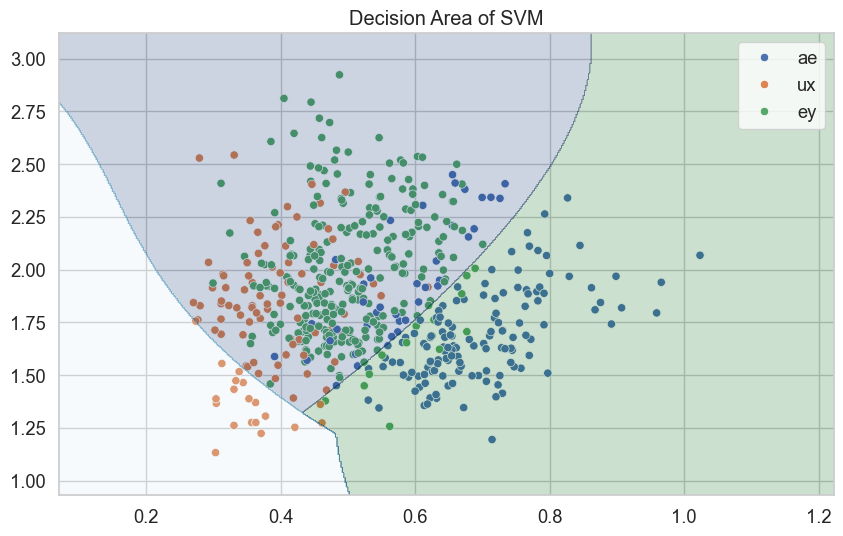

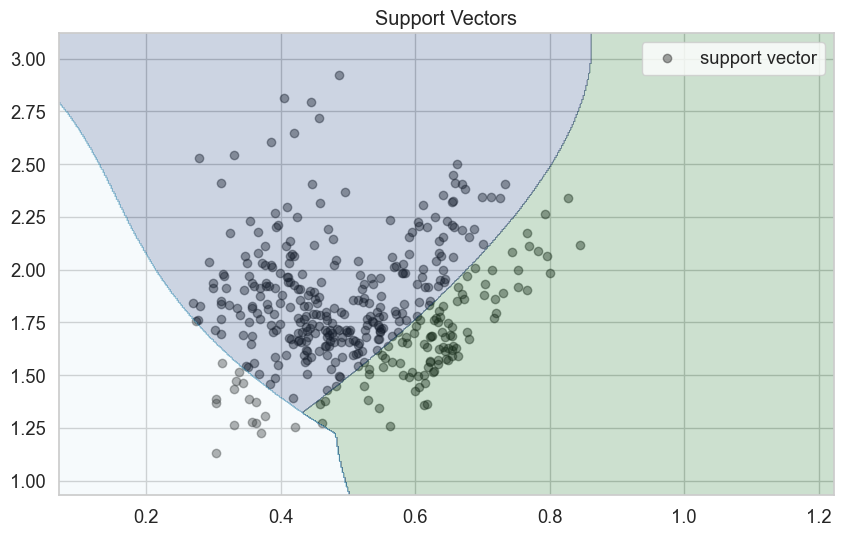

In [28]:
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

def Plot_SVM_decision_regions(clf: SVC, data: np.array, labels: np.array) -> None:
    '''
    This function is for plotting the decision area of SVM

    Args:
    - clf: SVM model
    - data: Data with two features
    - labels: Corresponding labels of the data
    '''
    x_min, x_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    y_min, y_max = data[:,1].min() - 0.2, data[:,1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),np.arange(y_min, y_max, 0.002))
    # we need to use the LabelEncoder here to make contourf work
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = label_encoder.transform(Z)
    Z = Z.reshape(xx.shape)
    #Plotting
    plt.figure(figsize=(10,6))
    sns.scatterplot(x = data[:,0], y = data[:,1],hue=labels)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.2)
    plt.legend()
    plt.title('Decision Area of SVM')
    plt.show()

def Plot_Support_Vectors(clf: SVC, data: np.array) -> None:
    '''
    This function is for plotting the support vectors of the SVM model

    Args:
    - clf: SVM model
    - data: Data with two features
    '''
    x_min, x_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    y_min, y_max = data[:,1].min() - 0.2, data[:,1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),np.arange(y_min, y_max, 0.002))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # we need to use the LabelEncoder here to make contourf work
    label_encoder = LabelEncoder()
    Z = label_encoder.fit_transform(Z)
    Z = Z.reshape(xx.shape)
    #Plotting
    plt.figure(figsize=(10,6))
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], c='k',alpha=0.4,label='support vector')
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.2)
    plt.legend()
    plt.title('Support Vectors')
    plt.show()


X_train = np.array(train[train.columns[3:5]]) #feature vector [F1, F2]
Y_train = np.array(train['Phoneme'])          #label vector

clf = SVC(kernel='rbf', gamma='auto') #rbf is some gaussian higher dimentional mapping wizardry
clf.fit(X_train,Y_train)

Plot_SVM_decision_regions(clf, X_train, Y_train)
Plot_Support_Vectors(clf,X_train)



a few points have dissapeared in the plot support vector plot. As i understand it this should only plot the points that have a significance on the barrier. Should there not be fewer points?

### Task 10

Create a linear SVM with different penalty terms $C=\{0.1, 1, 10\}$ and compare with the results in Problem 1.

C = 0.1


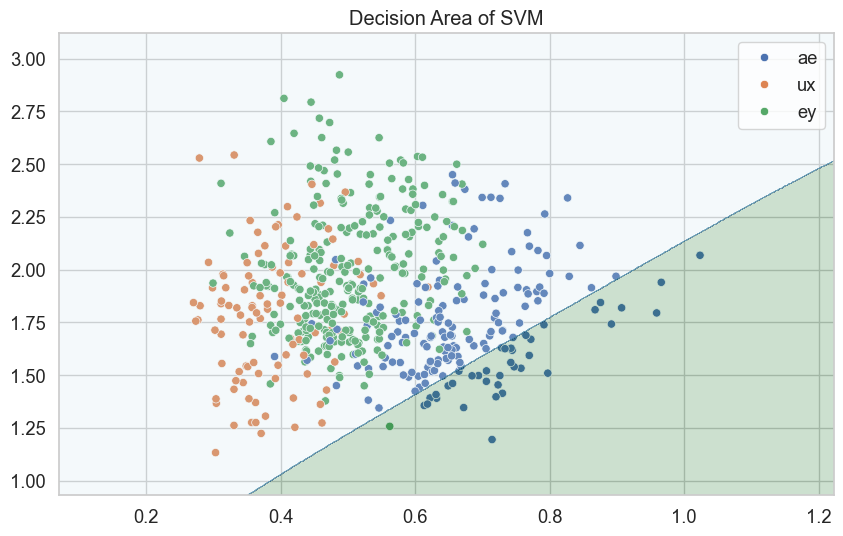

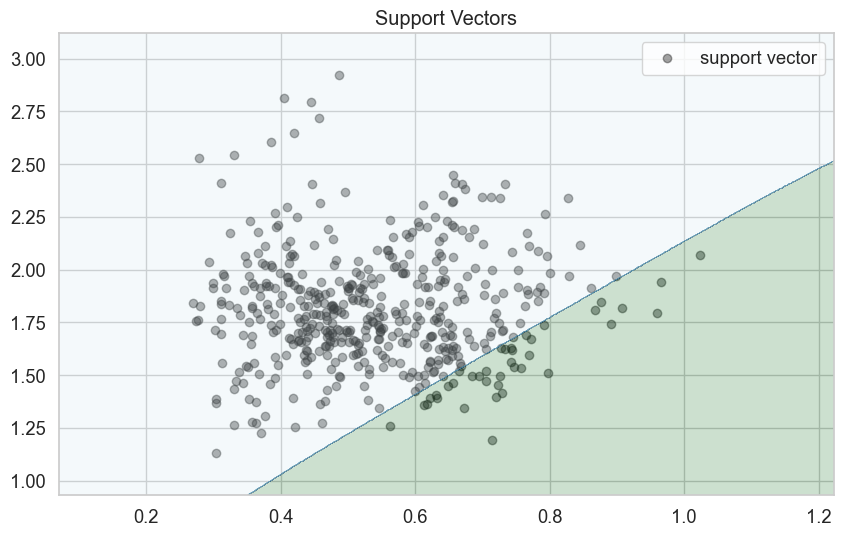

C = 1


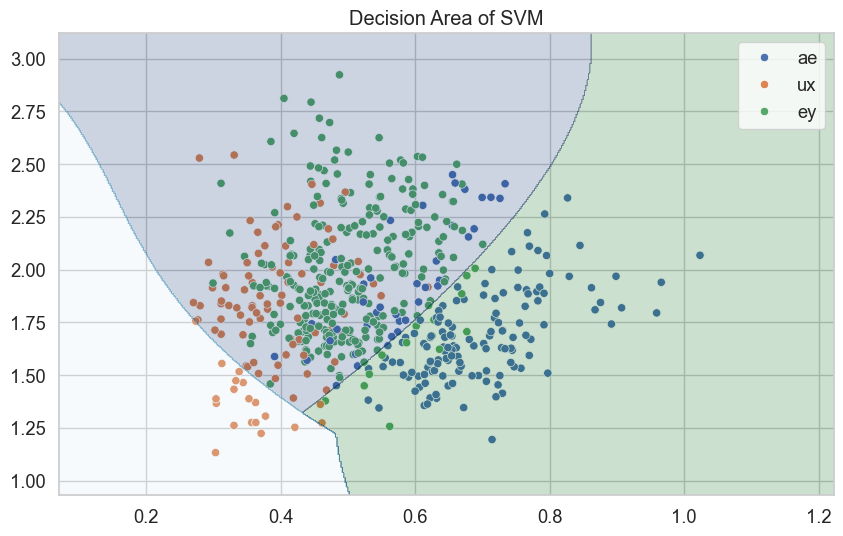

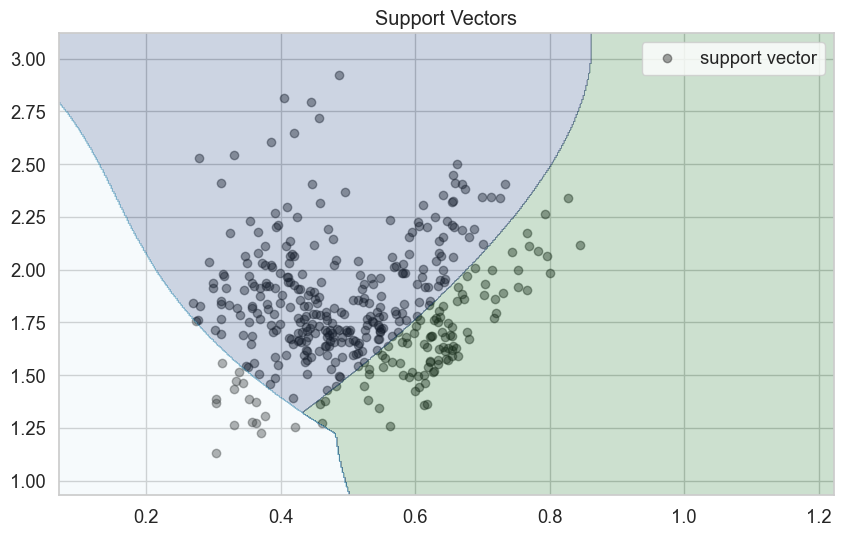

C = 10


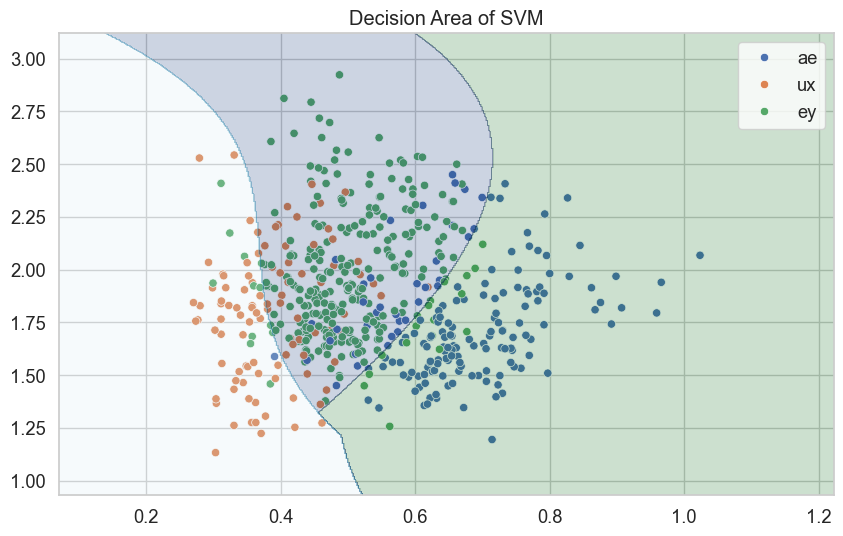

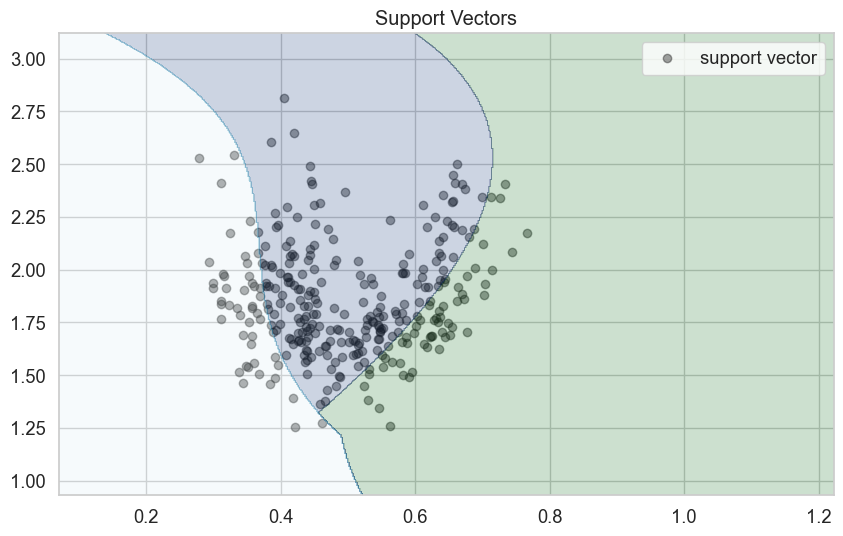

In [30]:
print("C = 0.1")
C = 0.1
clf = SVC(C = C, kernel='rbf', gamma='auto') #rbf is some gaussian higher dimentional mapping wizardry
clf.fit(X_train,Y_train)

Plot_SVM_decision_regions(clf, X_train, Y_train)
Plot_Support_Vectors(clf,X_train)

print("C = 1")
C = 1
clf = SVC(C = C, kernel='rbf', gamma='auto') #rbf is some gaussian higher dimentional mapping wizardry
clf.fit(X_train,Y_train)

Plot_SVM_decision_regions(clf, X_train, Y_train)
Plot_Support_Vectors(clf,X_train)

print("C = 10")
C = 10
clf = SVC(C = C, kernel='rbf', gamma='auto') #rbf is some gaussian higher dimentional mapping wizardry
clf.fit(X_train,Y_train)

Plot_SVM_decision_regions(clf, X_train, Y_train)
Plot_Support_Vectors(clf,X_train)

It looks like C = 10 is superior, I have allso looked at 100 for fun and it looks quite similar to the C = 10.
But should we not allways just keep the C high? it does not seem to have many downsides? not even for overfitting...

### Task 11

Try different kernels ('rbf', 'poly', 'sigmoid') and compare the results. Choose one of the kernels and use different penalty terms $C$. What happens with the performance on the training set when you increase $C$? What happens with the performance on the test set?

C = 1
rbf


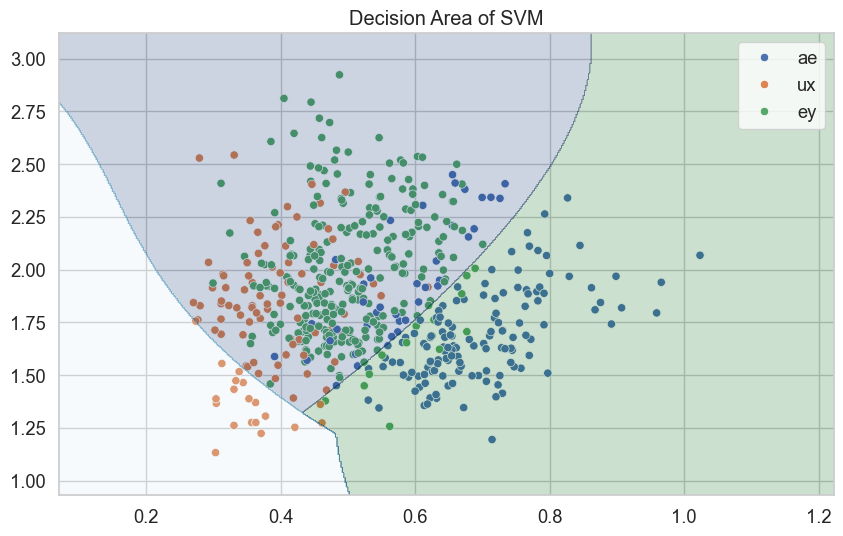

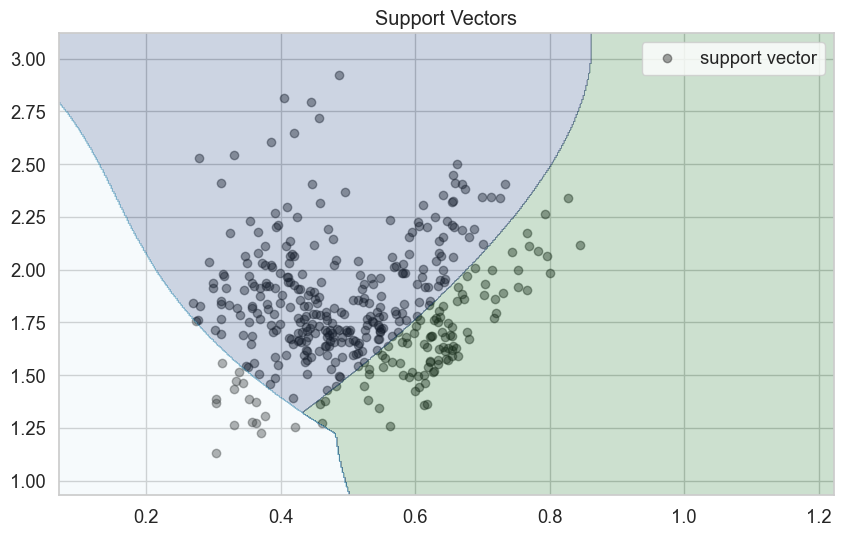

poly


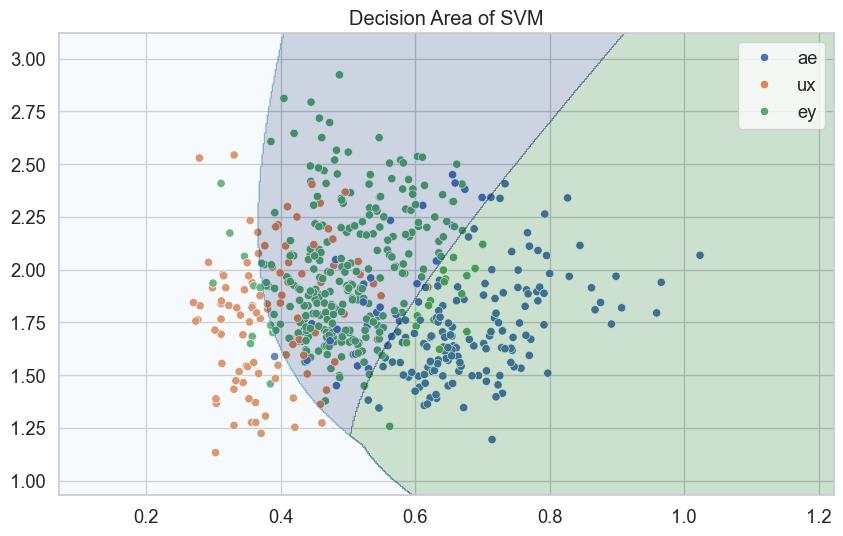

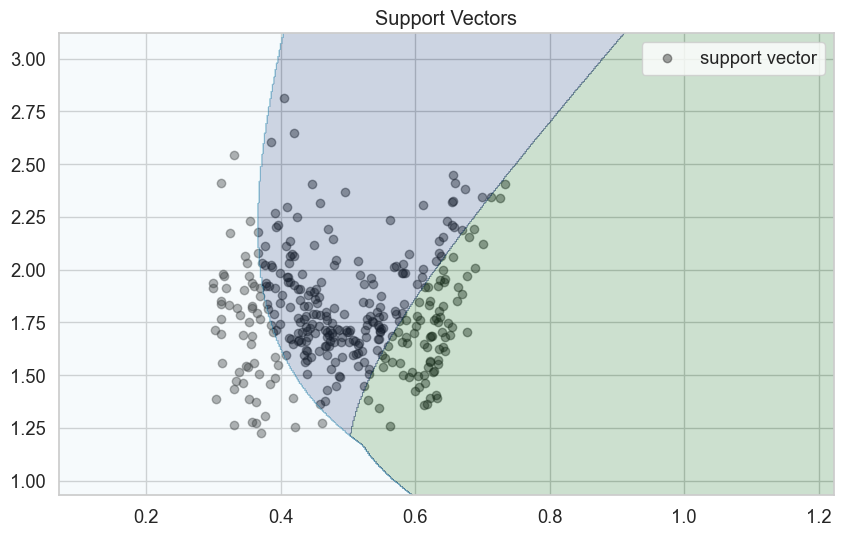

sigmoid


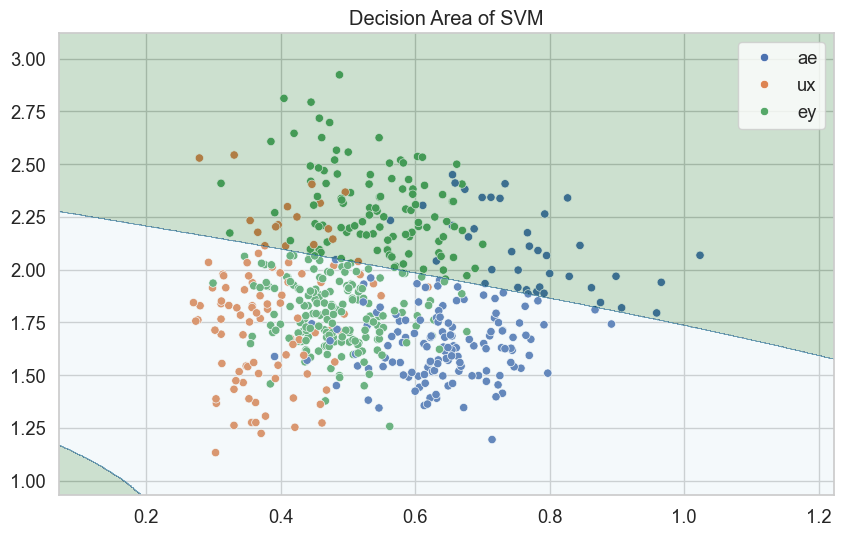

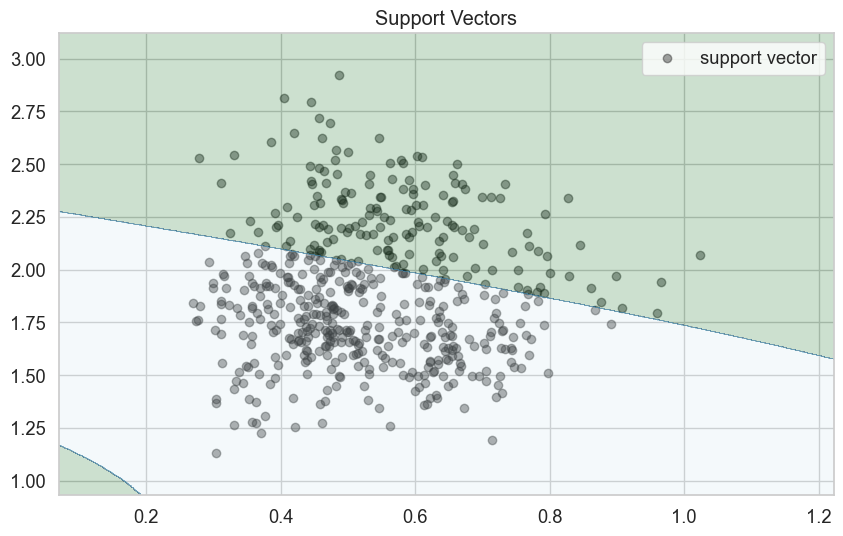

In [35]:
print("C = 1")
C = 1
kernel = 'rbf'
print(kernel)
clf = SVC(C = C, kernel=kernel, gamma='auto') #rbf is some gaussian higher dimentional mapping wizardry
clf.fit(X_train,Y_train)

Plot_SVM_decision_regions(clf, X_train, Y_train)
Plot_Support_Vectors(clf,X_train)


kernel = 'poly'
print(kernel)
clf = SVC(C = C, kernel=kernel, gamma='auto') #rbf is some gaussian higher dimentional mapping wizardry
clf.fit(X_train,Y_train)

Plot_SVM_decision_regions(clf, X_train, Y_train)
Plot_Support_Vectors(clf,X_train)


kernel = 'sigmoid'
print(kernel)
clf = SVC(C = C, kernel=kernel, gamma='auto') #rbf is some gaussian higher dimentional mapping wizardry
clf.fit(X_train,Y_train)

Plot_SVM_decision_regions(clf, X_train, Y_train)
Plot_Support_Vectors(clf,X_train)

poly


[]

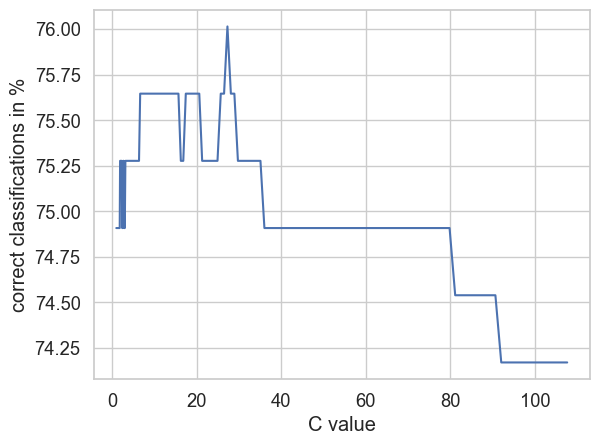

In [54]:
kernel = 'poly'
print(kernel)
C = 0.1

X_test = np.array(test[test.columns[3:5]])
Y_test = np.array(test['Phoneme'])
#print(X_test)

different_C = 150
C_list = np.zeros(different_C)
scores = np.zeros(different_C)


for i in range (different_C): #just because C should not be 0
    C = 1.05**(i-C/2)
    C_list[i] = C


    clf = SVC(C = C, kernel=kernel, gamma='auto') #rbf is some gaussian higher dimentional mapping wizardry
    clf.fit(X_train,Y_train)

    predicions = np.array(clf.predict(X_test))
    scores[i] = np.size(np.where(predicions == Y_test)) / X_test.shape[0] # get score in %

plt.plot(C_list, scores*100)
plt.xlabel('C value')
plt.ylabel('correct classifications in %')
plt.plot()

